<a href="https://colab.research.google.com/github/Chandu-2122/TensorFlow/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main goal of natural language processing (NLP) is to derive information from natural language(sequence to sequence problems) like:

Text (such as that contained in an email, blog post, book, Tweet)

Speech (a conversation you have with a doctor, voice commands you give to a smart speaker)

NLP process:

Downloading a text dataset

Visualizing text data

Converting text into numbers using tokenization

Turning our tokenized text into an embedding

Modelling a text dataset

Starting with a baseline (TF-IDF)

Building several deep learning text models

Dense, LSTM, GRU, Conv1D, Transfer learning

Comparing the performance of each our models

Combining our models into an ensemble

Saving and loading a trained model

Find the most wrong predictions

#Checking for GPU

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-4ca352d3-94f9-606b-7fc3-a2113762a0b8)


#Getting helper functions

The script containing our helper functions to do small tasks can be found on GitHub.

In [2]:
#downloading helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-12-19 17:34:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-19 17:34:59 (98.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

#Downloading the text dataset

We will be using Real or Not? dataset from kaggle which contains text-based Tweets about natural disasters.

In [4]:
#download data same as from kaggle
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")


--2022-12-19 17:35:02--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-12-19 17:35:02 (98.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



Unzipping nlp_getting_started.zip gives the following 3 .csv files:

sample_submission.csv - an example of the file you'd submit to the Kaggle competition of your model's predictions.

train.csv - training samples of real and not real diaster Tweets.

test.csv - testing samples of real and not real diaster Tweets.


#Visualizing the dataset

Let's convert our .csv files into pandas dataframe

In [5]:
!ls nlp_getting_started

ls: cannot access 'nlp_getting_started': No such file or directory


In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [7]:
train_df[train_df["keyword"]=="catastrophe"]

,id,keyword,location,text,target
1461,2109,catastrophe,NaN,.@robdelaney Catastrophe is anything but! I l...,1
1462,2110,catastrophe,"Wellington, New Zealand",@APPLEOFFIClAL Migrating from iPhoto to Photo ...,0
1463,2111,catastrophe,"West Virginia, USA",Cultivating Joy In The Face Of Catastrophe And...,0
1464,2112,catastrophe,NaN,#Borrowers concerned at possible #interest rat...,0
1465,2113,catastrophe,?? ??,.@uriminzok The coming catastrophe of the dest...,0
1466,2114,catastrophe,NaN,failure is a misfortunebut regret is a catastr...,0
1467,2115,catastrophe,Florida,@deb117 7/30 that catastrophe man opens school...,0
1468,2116,catastrophe,NaN,#iphone #twist Ultimate #preparedness library:...,0
1469,2117,catastrophe,NaN,@gemmahentsch @megynkelly @DLoesch I can not e...,0
1470,2118,catastrophe,NaN,@peterjukes But there are good grounds to beli...,1


In [8]:
#shuffling the data
train_df_shuffled = train_df.sample(frac=1, random_state=22) 
#shuffle with random_state=22 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
1467,2115,catastrophe,Florida,@deb117 7/30 that catastrophe man opens school...,0
6453,9232,suicide%20bombing,NaN,meek mill should join isis since he loves suic...,0
5698,8131,rescued,Ireland,Three beached whales rescued in Kerry - http:/...,1
5769,8236,riot,Seattle,Southeast Dirt Riot Series Crowns Champions: ...,0
6853,9822,trauma,NaN,Hiroshima: They told me to paint my story: Eig...,1


In [9]:
#Let's view the column names in both test and training dataset
print("Column names in training dataset:", list(train_df.columns))
print("Column names in testing dataset:", test_df.columns)

Column names in training dataset: ['id', 'keyword', 'location', 'text', 'target']
Column names in testing dataset: Index(['id', 'keyword', 'location', 'text'], dtype='object')


We can see that there is no 'target' column in the testing data.

So, we are going to be writing the code to find patterns of different combinations of words in the 'text' column of the training dataset to predict the values of the 'target' column.

In [10]:
#let's see how many are there in each type of target
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

We can see that we will be dealing with binary classification:

1 = a real disaster Tweet

0 = not a real disaster Tweet

In [11]:
#let's view the total no.of samples we have
print(f"total training samples: {len(train_df)}")
print("total test samples:", len(test_df))
print("total samples:", len(train_df)+len(test_df))

total training samples: 7613
total test samples: 3263
total samples: 10876


In [12]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row #_ gets rid of the index value 
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
Ari's hints and snippets will be the death of me.

---

Target: 0 (not real disaster)
Text:
Time collapse is such a cool video technique.  https://t.co/upLFSqMr0C

---

Target: 0 (not real disaster)
Text:
I understand you wanting to hang out with your guy friends I'll give you your space but don't ruin my trust with you.

---

Target: 1 (real disaster)
Text:
A Look at State Actions a Year After #Ferguson's Upheaval http://t.co/qwSbVfLPE1

---

Target: 1 (real disaster)
Text:
News@ Refugio oil spill may have been costlier bigger than projected http://t.co/jhpdSSVhvE

---



In [13]:
train_df_shuffled["text"][2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

#Splitting into training and validation sets

In [14]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(), #array
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=22) # random state for reproducibility


In [15]:
train_sentences[:5], train_labels[:5]

(array(["RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard",
        '#Colorado #News Motorcyclist bicyclist injured in Denver collision on Broadway: At least two people were tak... http://t.co/2iAFPmqJeP',
        "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU",
        'HURRICANE GUILLERMO LIVE NOAA TRACKING / LOOPING WED.AUG.5TH ~ http://t.co/RjopJKbydR ~  http://t.co/NUFDgw9YEv http://t.co/2oKSCwYoHC',
        '@morehouse64 It appears our #Govt has lost an #Ethical and or moral relevance. This means the whole #USA population is in danger from them.'],
       dtype=object), array([1, 1, 1, 1, 0]))

In [16]:
#checking the lengths
len(train_sentences), len(train_labels)

(6851, 6851)

In [17]:
len(val_sentences), len(val_labels)

(762, 762)

#Converting text into numbers

A machine learning algorithm requires its inputs to be in numerical form.

Tokenization: converting each word/character(token) to a number.

Types:word level tokenization, character level tokenization, sub word tokenization

Embedding: every word/character gets converted into a feature vector matrix.(representation of relationships between tokens). use embeddings by creating your own or reusing a pre learned embedding from TensorflowHub.

The process of each sample contains the following steps:

1. Standardize each sample(usually lowercasing + punctuation stripping)

2. Split each sample into substrings(usually words)

3. recombine substrings into tokens(usually ngrams-no.of words per split)

4. index tokens (associate a unique int value with each token)

5. transform each sample using this index, either into a vector of ints or a dense float vector.

In [18]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
#we can also use: tf.keras.layers.TextVectorization

#using the default parameters
text_vectorizer = TextVectorization(max_tokens = None, #max no.of words in the vocabulary, includes a value for OOV (out of vocabulary))
                                    standardize = "lower_and_strip_punctuation", # lowers text and removes all punctuation marks.
                                    split = "whitespace", #splits on spaces.
                                    ngrams = None,  #creates groups of n words
                                    output_mode = "int", #way of outputting the tokens
                                    output_sequence_length = None, #Length of tokenized sequence to output.
                                    pad_to_max_tokens = False) #if true, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than max_tokens. 



In [19]:
len(train_sentences[0].split())

11

In [20]:
len(train_sentences)

6851

In [21]:
#finding the average no.of tokens(words) in the training tweets.
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [22]:
 #setting up text vectorization variables

 max_vocab_length = 10000 #max no.of words to have in our vocabulary
 max_length = 15 #max length of sequences from the tweet

 text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                     output_mode = "int",
                                     output_sequence_length = max_length)

In [23]:
#fitting the text vectorizer to the training set

text_vectorizer.adapt(train_sentences)

In [24]:
#viewing the text vectorizer on a custom sentence
sample_sentence = "Hi world! How are you? I hope that you are doing well."
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1665,  105,   63,   21,   12,    8,  233,   16,   12,   21,  609,
         238,    0,    0,    0]])>

 the 0's at the end of the returned tensor, is because we set output_sequence_length=15, meaning no matter the size of the sequence we pass to text_vectorizer, it always returns a sequence with a length of 15.

In [25]:
#let's check it on a random sentence from the train sentences
random_sentence = random.choice(train_sentences)
print("the original text is:\n", random_sentence, "\n vectorized version is:\n")
text_vectorizer([random_sentence])

the original text is:
 @Bloodbath_TV favourite YouTube channel going right now.
Love everything you guys do and thank you introducing me to Dude Bro Party Massacre 
 vectorized version is:



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 5660,  112, 3109,   99,  166,   49,  114,  736,   12,  570,
          70,    7,  529,   12]])>

In [26]:
#let's check the unique tokens in our vocabulary using the get_vocabulary() method.

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")


Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['paramedics', 'paraguay', 'paradise', 'parade', 'paracord']


#converting numbers into embedding

parameters:
input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).

output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.

embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.

input_length - Length of sequences being passed to embedding layer.


In [27]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,#set input shape
                             output_dim = 128, #output shape
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length = max_length) #how long is each input

In [28]:
embedding

In [29]:
#let's check it on a random sentence from the train sentences
random_sentence = random.choice(train_sentences)
print("the original text is:\n", random_sentence, "\n\nembedded version is:")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

the original text is:
 Mane im not a Raiders Fan but they been in a drought. They need to go 10-6 lol 

embedded version is:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02164792,  0.04774182, -0.04527951, ...,  0.00869552,
         -0.0373032 , -0.02466962],
        [-0.02719255,  0.01207029,  0.036036  , ...,  0.04501344,
         -0.03858986, -0.02483296],
        [ 0.00298379,  0.04796869,  0.02805969, ..., -0.02636375,
         -0.00165633, -0.03877025],
        ...,
        [ 0.02665985, -0.01045359, -0.02996025, ...,  0.03828548,
          0.01882255,  0.0366508 ],
        [-0.02736924,  0.01189058, -0.03555019, ..., -0.01171125,
          0.03394112, -0.01662649],
        [-0.03340498, -0.04968831,  0.00810909, ..., -0.00851904,
         -0.00931442, -0.04951819]]], dtype=float32)>

Each token in the sentence gets turned into a length 128 feature vector.

In [30]:
#checking out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.02164792,  0.04774182, -0.04527951,  0.02838815,  0.01125596,
         0.02479983, -0.04617891,  0.03581801,  0.03179494,  0.03803447,
        -0.04721824,  0.03731574, -0.02196716, -0.02876793, -0.04887008,
         0.03509918,  0.02780633,  0.00962629, -0.04524333,  0.04420277,
         0.0228083 ,  0.04561993, -0.00832061,  0.02665016, -0.01961532,
        -0.02400054,  0.01837398,  0.00894254, -0.01563298, -0.00117116,
         0.02211699, -0.02849853,  0.00333997, -0.04977211, -0.00393164,
        -0.0322148 , -0.01847662, -0.00630359,  0.04624735, -0.00901405,
        -0.00043578,  0.00981579, -0.03834005,  0.01418683, -0.003747  ,
        -0.02352403, -0.03185107,  0.01799432,  0.04852087, -0.03127639,
        -0.01694226, -0.03297921, -0.03597121,  0.00105195, -0.04744241,
        -0.02870601,  0.00622137,  0.03245505, -0.01004994,  0.04629212,
         0.03698541, -0.0166343 ,  0.03400762, -0.03601416,  0.04392501,
  

#Modelling a text dataset

Since the data is converted into numbers, we can start to build the machine learning models now.

We will be building the following models and compare the results to know which performed best:

Model 0: Naive Bayes(baseline, simplest)-set of probabilistic classifiers that aim to process, analyze, and categorize data.

Model 1: Feed-forward neural network (dense model)-connections between nodes does not form a cycle. The opposite of a feed forward neural network is a recurrent neural network, in which certain pathways are cycled. 

Model 2: LSTM model-enables the network to remember inputs information for a longer period of time.(has input, output and forget gates)

Model 3: GRU model-can be trained to keep information from the past(update gate) or remove information that is irrelevant to the prediction(reset gate). Fixes vanishing gradient problem 

Model 4: Bidirectional-LSTM model-consists of two LSTMs: one taking the input in a forward direction, and the other in a backwards direction.

Model 5: 1D Convolutional Neural Network-using multiple copies of the same neuron in different places.

Model 6: TensorFlow Hub Pretrained Feature Extractor

Model 7: Same as model 6 with 10% of training data

Each experiment will go through the following steps:

Construct the model

Train the model

Make predictions with the model

Track prediction evaluation metrics for later comparison

#Model 0: Getting a baseline model

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm.

TfidfVectorizer()-Term Frequency Inverse Document Frequency: This function helps us to convert the text into vectors by counting the number of times each word appeared in a document.

TF-IDF value of a term = TF x IDF

Term frequency(TF) = (Number of times term 't' appears in a document)/(Number of terms in the document)

Inverse Document Frequency(IDF) = log(N/n), where, 'N' is the number of documents and 'n' is the number of documents a term 't' has appeared in.

The IDF value of a rare word is high, whereas the IDF of a frequent word is low.



In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#create tokenization and modelling pipeline
model_0 = Pipeline([  #building steps in order just like keras sequential model
                    ("tfidf", TfidfVectorizer()),  #converting text into numbers
                    ("clf", MultinomialNB())  #model the text    
])

#fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [32]:
#Evaluating our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print("Accuracy score of baseline model:",baseline_score*100)

Accuracy score of baseline model: 83.33333333333334


In [33]:
#making predictions with baseline model
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10] #predicted output

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [34]:
val_labels[:10] #actual output

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

#Creating an evaluation function for our model experiments

let's create a helper function which takes an array of predictions and ground truth labels for every model and computes the following:

Accuracy

Precision

Recall

F1-score

One of the parameter in precision_recall_fscore_support:

average{‘binary’, ‘micro’, ‘macro’, ‘samples’, ‘weighted’}, default=None

If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

'binary':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

'samples':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

In [35]:
#function to evaluate: accuracy, precision, recall, f1 score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """

  #calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred)*100

  #calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,  #precision is the ratio tp / (tp + fp)
                   "recall": model_recall,  #recall is the ratio tp / (tp + fn)
                   "f1": model_f1} #weighted harmonic mean of the precision and recall, 
                   #where an F-beta score reaches its best value at 1 and worst score at 0.}

  return model_results
  

In [36]:
#let's view the baseline results from the function we created

baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

#Model_1: A simple dense model

It is a single layer dense model.

It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

since we're going to be building a number of TensorFlow deep learning models, we'll import our create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.

In [37]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"



In [38]:
# Build model with the Functional API
from tensorflow.keras import layers
# inputs are 1-dimensional strings
inputs = layers.Input(shape=(1,), dtype="string") 
# turn the input text into numbers
x = text_vectorizer(inputs) 
# create an embedding of the numerized numbers
x = embedding(x) 
# lower the dimensionality of the embedding (try running the model without this layer and see what happens)
x = layers.GlobalAveragePooling1D()(x) 
# create the output layer, want binary outputs so use sigmoid activation
outputs = layers.Dense(1, activation="sigmoid")(x) 
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model


      

In [39]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [40]:
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [41]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20221219-173507
Epoch 1/5
215/215 [==============================] - 4s 6ms/step - loss: 0.6127 - accuracy: 0.6898 - val_loss: 0.5085 - val_accuracy: 0.8202
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4458 - accuracy: 0.8133 - val_loss: 0.4316 - val_accuracy: 0.8202
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3503 - accuracy: 0.8591 - val_loss: 0.4193 - val_accuracy: 0.8386
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2871 - accuracy: 0.8905 - val_loss: 0.4253 - val_accuracy: 0.8333
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2387 - accuracy: 0.9099 - val_loss: 0.4468 - val_accuracy: 0.8228


In [42]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.8228


[0.4467511475086212, 0.8228346705436707]

In [43]:
#making some predictions and evaluating them
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [44]:
model_1_pred_probs[:10] #predicted values

array([[0.99833727],
       [0.09818594],
       [0.10597119],
       [0.8963544 ],
       [0.00155129],
       [0.38279074],
       [0.8609975 ],
       [0.23097064],
       [0.58906406],
       [0.12506503]], dtype=float32)

In [45]:
val_labels[:10]  #actual values

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [46]:
#converting the model prediction probability values to the label format
#squeeze:Removes dimensions of size 1 from the shape of a tensor.
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [47]:
tf.round(model_1_pred_probs)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [48]:
#calculating the results of model_1
model_1_results = calculate_results(y_true = val_labels, y_pred = model_1_preds)
model_1_results

{'accuracy': 82.28346456692913,
 'precision': 0.8226450757390502,
 'recall': 0.8228346456692913,
 'f1': 0.8227269262463532}

In [49]:
#comparing to baseline
baseline_results

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

#Visualizing learned embeddings

In [50]:
#getting the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [51]:
words_in_vocab

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'are',
 'be',
 'was',
 'have',
 'like',
 'me',
 'up',
 'but',
 'so',
 'just',
 'as',
 'amp',
 'im',
 'not',
 'your',
 'out',
 'its',
 'after',
 'an',
 'will',
 'all',
 'no',
 'fire',
 'has',
 'when',
 'if',
 'we',
 'get',
 'now',
 'new',
 'via',
 'more',
 'or',
 'about',
 'they',
 'people',
 'dont',
 'what',
 'news',
 'he',
 'over',
 'one',
 'how',
 'been',
 'who',
 'into',
 'were',
 'can',
 'video',
 'do',
 'us',
 'emergency',
 '2',
 'disaster',
 'than',
 'there',
 'would',
 'police',
 'his',
 'her',
 'still',
 'some',
 'burning',
 'body',
 'back',
 'off',
 'california',
 'crash',
 'buildings',
 'why',
 'storm',
 'day',
 'time',
 'know',
 'man',
 'them',
 'suicide',
 'rt',
 'going',
 'had',
 'got',
 'first',
 'see',
 'nuclear',
 'world',
 'two',
 'our',
 'cant',
 'bomb',
 '3',
 'fires',
 'youtube',
 'attack',
 'love',
 'go',
 'd

In [52]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [53]:
#getting the weight matrix of embedding layer
#these are the numerical representations of each token in our training data which have been learnt for 5 epochs
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[ 0.02837469, -0.01519338,  0.04162248, ..., -0.00143163,
         0.02782711,  0.00836086],
       [ 0.02207127,  0.04276019, -0.04386932, ...,  0.01196408,
        -0.03603273, -0.02402976],
       [ 0.02875469,  0.05299776,  0.00231153, ..., -0.06808893,
        -0.02926953, -0.02765083],
       ...,
       [ 0.03670838,  0.06035487,  0.09175117, ..., -0.02117459,
         0.09314072,  0.00540106],
       [-0.0074181 ,  0.02493073, -0.01782993, ...,  0.04147354,
         0.00888075, -0.00230145],
       [ 0.08095538, -0.01169421,  0.03783584, ..., -0.0835985 ,
         0.01084063,  0.05440326]], dtype=float32)

In [54]:
embed_weights.shape

(10000, 128)

#Recurrent Neural Networks (RNN's)

The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

This concept is especially helpful when dealing with sequences such as passages of natural language text (such as our Tweets).

Variants in the RNN:

1. Long short term memory cells (LSTMs)

2. Gated Recurrent Units(GRUs)

3. Bidirectional RNN's(passes forward and backward along a sequence, left to right and right to left)

#Model_2: LSTM

we're going to add an LSTM layer between our embedding and output.

Input(text)->Tokenize->Embedding->Layers(RNNs/Dense)->Output(label probability)

In [55]:
#creating an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(units = 64, return_sequences = True)(x)  
#when we are stacking RNN cells together, we need to set return_sequences = True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation = "relu")(x)
#print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

In [56]:
#getting the summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [57]:
#compiling the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [58]:
#fitting the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20221219-173530
Epoch 1/5
215/215 [==============================] - 7s 9ms/step - loss: 0.2201 - accuracy: 0.9187 - val_loss: 0.5325 - val_accuracy: 0.8084
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1552 - accuracy: 0.9423 - val_loss: 0.6874 - val_accuracy: 0.8018
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1259 - accuracy: 0.9548 - val_loss: 0.7540 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1024 - accuracy: 0.9613 - val_loss: 0.8059 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0844 - accuracy: 0.9691 - val_loss: 0.9242 - val_accuracy: 0.7900


In [59]:
#making predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[9.99956727e-01],
       [1.08074516e-01],
       [9.49622830e-04],
       [9.85486269e-01],
       [2.69126118e-04],
       [3.30865830e-02],
       [9.99317050e-01],
       [6.84477249e-03],
       [9.27401006e-01],
       [8.71540792e-03]], dtype=float32)

In [60]:
#converting model_2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [61]:
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [62]:
val_labels[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [63]:
#calculating the results
model_2_results= calculate_results(y_true = val_labels,
                                   y_pred = model_2_preds)
model_2_results

{'accuracy': 79.00262467191601,
 'precision': 0.7892578629331097,
 'recall': 0.7900262467191601,
 'f1': 0.7893704133490197}

In [64]:
baseline_results

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

#Model:3 LSTM

In [65]:
#creating an GRU model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation = "relu")(x)
#print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

In [66]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [67]:
#compiling the model
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [68]:
#fitting the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_3_LSTM")])

Saving TensorBoard log files to: model_logs/model_3_LSTM/20221219-173543
Epoch 1/5
215/215 [==============================] - 4s 8ms/step - loss: 0.1591 - accuracy: 0.9390 - val_loss: 0.7162 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0843 - accuracy: 0.9692 - val_loss: 0.8200 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0718 - accuracy: 0.9723 - val_loss: 0.8746 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0620 - accuracy: 0.9745 - val_loss: 1.1034 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0528 - accuracy: 0.9765 - val_loss: 1.0987 - val_accuracy: 0.7585


In [69]:
#making predictions with GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[9.9993420e-01],
       [1.7559999e-01],
       [1.0805309e-03],
       [9.7708124e-01],
       [1.2945270e-04],
       [1.8424470e-03],
       [9.9913728e-01],
       [4.6146265e-03],
       [9.9358022e-01],
       [6.8304734e-03]], dtype=float32)

In [70]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [71]:
#calculating the results
model_3_results= calculate_results(y_true = val_labels,
                                   y_pred = model_3_preds)
model_3_results

{'accuracy': 75.8530183727034,
 'precision': 0.7621787544196879,
 'recall': 0.7585301837270341,
 'f1': 0.7594720561961684}

In [72]:
baseline_results

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

#Model 4: Bidirectonal RNN model

In [73]:
#creating an Bidirectional model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
#print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_Bidirectional")

In [74]:
#getting the summary
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [75]:
#compiling the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [76]:
#fitting the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_4_LSTM")])

Saving TensorBoard log files to: model_logs/model_4_LSTM/20221219-173553
Epoch 1/5
215/215 [==============================] - 6s 12ms/step - loss: 0.1101 - accuracy: 0.9666 - val_loss: 1.0083 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0577 - accuracy: 0.9756 - val_loss: 1.1736 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0466 - accuracy: 0.9793 - val_loss: 1.3016 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0431 - accuracy: 0.9791 - val_loss: 1.3293 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0427 - accuracy: 0.9806 - val_loss: 1.4241 - val_accuracy: 0.7520


In [77]:
#making predictions with bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[9.99979973e-01],
       [1.01394136e-03],
       [1.83537137e-04],
       [9.95271623e-01],
       [1.20846935e-05],
       [1.32492278e-03],
       [9.99888659e-01],
       [7.12386623e-04],
       [9.94646847e-01],
       [2.49995873e-03]], dtype=float32)

In [78]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [79]:
#calculating the results
model_4_results= calculate_results(y_true = val_labels,
                                   y_pred = model_4_preds)
model_4_results

{'accuracy': 75.19685039370079,
 'precision': 0.7558398222672278,
 'recall': 0.7519685039370079,
 'f1': 0.7529612026153994}

In [80]:
model_3_results

{'accuracy': 75.8530183727034,
 'precision': 0.7621787544196879,
 'recall': 0.7585301837270341,
 'f1': 0.7594720561961684}

Bidirectional-LSTM is giving bad results than GRU model

#Model_5: CNN 1D for text and other types of sequences

In [81]:
# Testing out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5,#looking at 5 words at a time
                        strides=1, #default, skipping the first word and continuing with the rest
                        activation = "relu",
                        padding = "same") #output will be same as the inputactivation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # getting the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [82]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03428603,  0.03122544,  0.00461079, ...,  0.06617481,
          0.02217629,  0.02016152],
        [-0.01445302,  0.00654703,  0.0290289 , ...,  0.01219433,
         -0.03243048,  0.00844325],
        [ 0.05006618, -0.0288115 ,  0.04041455, ..., -0.02723657,
          0.02632597, -0.03765038],
        ...,
        [ 0.02112085,  0.01457396, -0.00108965, ...,  0.02662428,
          0.01034607, -0.00167463],
        [ 0.02112085,  0.01457396, -0.00108965, ...,  0.02662428,
          0.01034607, -0.00167463],
        [ 0.02112085,  0.01457396, -0.00108965, ...,  0.02662428,
          0.01034607, -0.00167463]]], dtype=float32)>

In [83]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.09142403, 0.        , 0.02152052, 0.00766246, 0.        ,
         0.        , 0.02729173, 0.03118492, 0.03338341, 0.        ,
         0.03032018, 0.01149432, 0.        , 0.01202205, 0.01125849,
         0.        , 0.        , 0.        , 0.010528  , 0.04119675,
         0.        , 0.        , 0.03269086, 0.        , 0.        ,
         0.00867069, 0.        , 0.        , 0.00108483, 0.        ,
         0.04265711, 0.        ],
        [0.01880841, 0.        , 0.01388094, 0.        , 0.02720241,
         0.05431462, 0.        , 0.        , 0.02453585, 0.        ,
         0.13153863, 0.        , 0.01440298, 0.        , 0.        ,
         0.00507583, 0.01422143, 0.03268483, 0.        , 0.        ,
         0.05007984, 0.        , 0.        , 0.04098433, 0.        ,
         0.        , 0.        , 0.02527506, 0.        , 0.        ,
         0.01682978, 0.02569659],
        [0.01424623, 0.0450446 , 0.        , 0.    

In [84]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.09142403, 0.0450446 , 0.07933389, 0.05004157, 0.02720241,
        0.05453724, 0.05713313, 0.03118492, 0.08010772, 0.08860241,
        0.13153863, 0.05912453, 0.0286217 , 0.06216367, 0.06304954,
        0.02174526, 0.04875235, 0.03268483, 0.04889596, 0.04119675,
        0.05007984, 0.00773486, 0.07585513, 0.05369338, 0.08701962,
        0.01277559, 0.05027603, 0.04219884, 0.09036068, 0.        ,
        0.07820354, 0.02569659]], dtype=float32)>

In [85]:
#building the CNN1D model
from tensorflow.keras import layers
inputs = layers.Input(shape =(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64, kernel_size = 5, strides = 1, activation = "relu", padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [86]:
#fittting our 1D CNN model to our text data.

model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20221219-173621
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.1189 - accuracy: 0.9651 - val_loss: 0.9653 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0753 - accuracy: 0.9710 - val_loss: 1.1058 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0626 - accuracy: 0.9750 - val_loss: 1.2271 - val_accuracy: 0.7507
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0547 - accuracy: 0.9781 - val_loss: 1.3046 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0522 - accuracy: 0.9775 - val_loss: 1.3146 - val_accuracy: 0.7362


In [87]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[1.0000000e+00],
       [1.4443927e-02],
       [2.7268012e-03],
       [4.3184945e-01],
       [7.7700264e-08],
       [1.1017074e-04],
       [9.9986303e-01],
       [2.0655339e-04],
       [9.0503377e-01],
       [1.0449069e-01]], dtype=float32)

In [88]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [89]:
# Calculate model_5 evaluation metrics 
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 73.62204724409449,
 'precision': 0.7378389883775414,
 'recall': 0.7362204724409449,
 'f1': 0.7368151793077514}

In [90]:
baseline_results

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

#Model_6:  TensorFlow Hub-Pretrained Sentence Encoder

In [91]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")
embed_samples = embed([sample_sentence,
                       "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[ 0.03131709  0.05056588  0.04521656  0.02834483  0.01331795  0.05679373
  0.00666799  0.06959859 -0.01978569 -0.04904083  0.06660289  0.02081934
 -0.06427109 -0.00874941 -0.06268819  0.00671979 -0.02038973 -0.18132892
 -0.03427249  0.00836241 -0.00572656 -0.04895022  0.00313158 -0.01450487
  0.03645915  0.05832612 -0.08921722  0.02370855  0.05378701  0.08655767
 -0.00829862 -0.06602843 -0.0471999  -0.03503707  0.03976117 -0.03169614
  0.05754755 -0.01976361 -0.01643012 -0.03312145 -0.00466546  0.02529729
 -0.01356734  0.02915883  0.06647389 -0.02373346 -0.04707127  0.00129398
 -0.0478239  -0.08853508], shape=(50,), dtype=float32)


In [92]:
sample_sentence

'Hi world! How are you? I hope that you are doing well.'

In [93]:
embed_samples.shape

TensorShape([2, 512])

In [94]:
embed_samples[0].shape

TensorShape([512])

In [95]:
#creating the keras layer using the USE pretrained layer from tensorflow hub
sentence_encode_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-large/5",
                                       input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")


In [96]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encode_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               147354880 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 147,391,937
Trainable params: 37,057
Non-trainable params: 147,354,880
_________________________________________________________________


In [97]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])


Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20221219-173714
Epoch 1/5
215/215 [==============================] - 42s 70ms/step - loss: 0.4744 - accuracy: 0.7940 - val_loss: 0.4011 - val_accuracy: 0.8346
Epoch 2/5
215/215 [==============================] - 9s 44ms/step - loss: 0.3836 - accuracy: 0.8320 - val_loss: 0.4060 - val_accuracy: 0.8268
Epoch 3/5
215/215 [==============================] - 10s 48ms/step - loss: 0.3616 - accuracy: 0.8440 - val_loss: 0.4078 - val_accuracy: 0.8307
Epoch 4/5
215/215 [==============================] - 10s 48ms/step - loss: 0.3394 - accuracy: 0.8552 - val_loss: 0.4113 - val_accuracy: 0.8386
Epoch 5/5
215/215 [==============================] - 14s 65ms/step - loss: 0.3138 - accuracy: 0.8701 - val_loss: 0.4236 - val_accuracy: 0.8373


In [98]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 5s 42ms/step


array([[0.9965084 ],
       [0.06514587],
       [0.23729642],
       [0.84910923],
       [0.05720283],
       [0.1993195 ],
       [0.18402863],
       [0.06785306],
       [0.34288898],
       [0.36396638]], dtype=float32)

In [99]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [100]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 83.72703412073491,
 'precision': 0.8385584953155267,
 'recall': 0.8372703412073491,
 'f1': 0.8354957666020125}

In [101]:
#comparing with the baseline model
baseline_results

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

Model_6 almost tried to beat the baseline model with the layers increment...


#Model_7: TF Hub pretrained USE but with 10% of training data

 we're going to make a small subset of the training data (10%), train a model and evaluate it.

In [103]:
import numpy as np
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=22)


In [104]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


To make sure we're making an appropriate comparison between our model's ability to learn from the full training set and 10% subset, we'll clone our USE model (model_6) using the tf.keras.models.clone_model() method.

Doing this will create the same architecture but reset the learned weights of the clone target (pretrained weights from the USE will remain but all others will be reset).

In [105]:
#cloning model_6 but resetting the weights
model_7 = tf.keras.models.clone_model(model_6)

#compiling the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#getting a summary same like the model_6
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               147354880 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 147,391,937
Trainable params: 37,057
Non-trainable params: 147,354,880
_________________________________________________________________


In [106]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])


Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20221219-174025
Epoch 1/5
22/22 [==============================] - 34s 343ms/step - loss: 0.6798 - accuracy: 0.6545 - val_loss: 0.6552 - val_accuracy: 0.7835
Epoch 2/5
22/22 [==============================] - 2s 91ms/step - loss: 0.6095 - accuracy: 0.8017 - val_loss: 0.5646 - val_accuracy: 0.7940
Epoch 3/5
22/22 [==============================] - 2s 87ms/step - loss: 0.4854 - accuracy: 0.8222 - val_loss: 0.4673 - val_accuracy: 0.7966
Epoch 4/5
22/22 [==============================] - 2s 88ms/step - loss: 0.3814 - accuracy: 0.8440 - val_loss: 0.4595 - val_accuracy: 0.7848
Epoch 5/5
22/22 [==============================] - 2s 89ms/step - loss: 0.3112 - accuracy: 0.8746 - val_loss: 0.4706 - val_accuracy: 0.7913


In [107]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 6s 45ms/step


array([[0.98958814],
       [0.02700598],
       [0.27343273],
       [0.7676864 ],
       [0.18390043],
       [0.23875996],
       [0.31475443],
       [0.20263398],
       [0.3083981 ],
       [0.35285136]], dtype=float32)

In [108]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [109]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 79.13385826771653,
 'precision': 0.7936140150821528,
 'recall': 0.7913385826771654,
 'f1': 0.7919831769907685}

In [110]:
baseline_results

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

#Comparing the performance of each of our models

creating a pandas dataframe to view the results of each model

In [111]:
models_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
models_results = models_results.transpose()
models_results

,accuracy,precision,recall,f1
baseline,83.333333,0.841220,0.833333,0.829376
simple_dense,82.283465,0.822645,0.822835,0.822727
lstm,79.002625,0.789258,0.790026,0.789370
gru,75.853018,0.762179,0.758530,0.759472
bidirectional,75.196850,0.755840,0.751969,0.752961
conv1d,73.622047,0.737839,0.736220,0.736815
tf_hub_sentence_encoder,83.727034,0.838558,0.837270,0.835496
tf_hub_10_percent_data,79.133858,0.793614,0.791339,0.791983


#Saving and loading a trained model

Two main ways to save a model in TF:

1. The HDF5 format.

2. The SavedModel format (default).

In [112]:
#saving using HDF5 format
model_6.save("model_6.h5")

If you save a model as a HDF5, when loading it back in, you need to let TensorFlow know about any custom objects you've used (e.g. components which aren't built from pure TensorFlow, such as TensorFlow Hub components).

In [114]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})


In [115]:
#looking at the way our loaded model performing:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 6s 46ms/step - loss: 0.4236 - accuracy: 0.8373


[0.42356076836586, 0.8372703194618225]

In [117]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.5641 - accuracy: 0.7900


[0.5641358494758606, 0.7900262475013733]

Calling the save() method on our target model and passing it a filepath allows us to save our model in the SavedModel format.

In [118]:
#saving to the SavedModel format
model_6.save("model_6_SavedModel_format")

If you use SavedModel format (default), you can reload your model without specifying custom objects using the tensorflow.keras.models.load_model() function.

In [119]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")


In [120]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 6s 46ms/step - loss: 0.4236 - accuracy: 0.8373


[0.4235606789588928, 0.8372703194618225]

Either of the methods of saving and loading the models gives us the same result...

But for most use cases, the SavedModel format will suffice. However, this is a TensorFlow specific standard. If you need a more general-purpose data standard, HDF5 might be better. 

#Finding the most wrong examples

One of the best ways to inspect your data is to sort your model's predictions and find the samples it got most wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

In [121]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,Three-alarm fire destroys two residential buil...,1,1.0,0.996508
1,Do you feel engulfed with low self-image? Take...,0,0.0,0.065146
2,James Kunstler: How bad architecture wrecked c...,0,0.0,0.237296
3,natural disaster ÛÒ News Stories About natura...,1,1.0,0.849109
4,New Explosion-proof Tempered Glass Screen Prot...,0,0.0,0.057203


Now let's find our model's wrong predictions (where target != pred) and sort them by their prediction probability (the pred_prob column).

In [123]:
# Finding the wrong predictions and sorting by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
136,Kosciusko police investigating pedestrian fata...,0,1.0,0.998104
106,Mourning notices for stabbing arson victims st...,0,1.0,0.982159
69,Google Alert: Emergency units simulate a chemi...,0,1.0,0.976612
555,Former Township fire truck being used in Phili...,0,1.0,0.970742
420,It's a deluge in Trois-Rivieres. About one hou...,0,1.0,0.959786
757,LRT LOOK AT ALL MY TOM FEELS FLOODING BACK,0,1.0,0.931062
463,RT @DianneG: Gunshot wound #9 is in the bicep....,0,1.0,0.912370
230,Zimbabwe is a country with a collapsed governm...,0,1.0,0.904149
345,Epilepsy claims another. Common and still a ch...,0,1.0,0.902281
90,RAIN RAIN GO AWAY... A soaker is on the way \n...,0,1.0,0.881174


Now we can see the false positives from the sorted samples of most_wrong DataFrame.

In [126]:
#Checking for the false positives(predicting 1 instead of 0)

for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row #leaving the index values taking the rest of the values
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9981037378311157
Text:
Kosciusko police investigating pedestrian fatality hit by a train Thursday http://t.co/m5djLLxoZP

----

Target: 0, Pred: 1, Prob: 0.9821586012840271
Text:
Mourning notices for stabbing arson victims stir Û÷politics of griefÛª in Israel: Posters for Shira Banki and A... http://t.co/3GZ5zQQTHe

----

Target: 0, Pred: 1, Prob: 0.9766117930412292
Text:
Google Alert: Emergency units simulate a chemical explosion at NU http://t.co/NDgpWYxu6H

----

Target: 0, Pred: 1, Prob: 0.9707418084144592
Text:
Former Township fire truck being used in Philippines - Langley Times http://t.co/iMiLsFxntf #filipino

----

Target: 0, Pred: 1, Prob: 0.9597859382629395
Text:
It's a deluge in Trois-Rivieres. About one hour to get to #legionstrackandfield http://t.co/PuE5xNZnQB

----

Target: 0, Pred: 1, Prob: 0.9310624003410339
Text:
LRT LOOK AT ALL MY TOM FEELS FLOODING BACK

----

Target: 0, Pred: 1, Prob: 0.9123696684837341
Text:
RT @DianneG: Gunshot wound

Now let's view the  bottom end of our most_wrong DataFrame to inspect false negatives (model predicts 0, not a real diaster Tweet, when it should've predicted 1, real diaster Tweet).

In [127]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.046132124960422516
Text:
Someone teaching you that obedience will obliterate trials in your life is trying to sell you a used car. Jesus's life blows that theory.'

----

Target: 1, Pred: 0, Prob: 0.043872032314538956
Text:
@BradleyBrad47 yeah but being fast and doing extremely high damage is what its all about if you want fast then im gonna have to get u the-

----

Target: 1, Pred: 0, Prob: 0.04301667585968971
Text:
Stemming from my #Cubs talk- the team rosters 2 cancer survivors in @ARizzo44 &amp; @JLester34...@Cubs fans: help another http://t.co/XGnjgLE9eQ

----

Target: 1, Pred: 0, Prob: 0.03915736451745033
Text:
#PBBan (Temporary:300) hyider_ghost2 @'aRmageddon | DO NOT KILL | FLAGS ONLY | Fast XP' for Reason

----

Target: 1, Pred: 0, Prob: 0.03680930286645889
Text:
@SaintRobinho86 someone has to be at the bottom of every league. Tonight clearly demonstrated why the Lions are where they are - sunk!

----

Target: 1, Pred: 0, Prob: 0.03014947660267353


In [128]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 354ms/step
Pred: 0, Prob: 0.13772046566009521
Text:
Seen on Fahlo:#WCW All Hail the QueenåÊ?? http://t.co/zrhXy9iBno http://t.co/Opjz8fGdIy

----

1/1 [==============================] - 0s 155ms/step
Pred: 0, Prob: 0.18139323592185974
Text:
Not only did Drake kill Meek Mill but he started T bagging his his dead body ????????????

----

1/1 [==============================] - 0s 102ms/step
Pred: 0, Prob: 0.06077865883708
Text:
Starting a GoFundMe page for a new set of rims since i demolished mine last night #helpabrotherout

----

1/1 [==============================] - 0s 169ms/step
Pred: 0, Prob: 0.06060149148106575
Text:
chickmt123: #letsFootball #atk WIRED : Reddit will now quarantine offensive content http://t.co/wvn6GrIyPq (httpÛ_ http://t.co/pgIHchdURJ

----

1/1 [==============================] - 0s 138ms/step
Pred: 0, Prob: 0.06051542982459068
Text:
Senators have another year to determine Hoffman's v... #ColoradoAvs #NHLAvalanche http://

#The speed/score tradeoff

The point here is to illustrate the best model you find through experimentation, might not be the model you end up using in production.

To make this more concrete, let's write a function to take a model and a number of samples and time how long the given model takes to make predictions on those samples.

In [129]:
# Calculate the time taken by predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

Now let's use our pred_timer() function to evaluate the prediction times of our best performing model (model_6) and our baseline model (model_0).

In [130]:
# Calculating TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 2s 80ms/step


(2.609680080999169, 0.0034247770091852614)

In [131]:
# Calculating Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.05050601899984031, 6.628086482918676e-05)

It seems that our best performing model takes over more time to make predictions as our baseline model.

Now lets compare the F1 score(combination of precision and recall, usually a good overall metric for a classification model) with time per prediction.

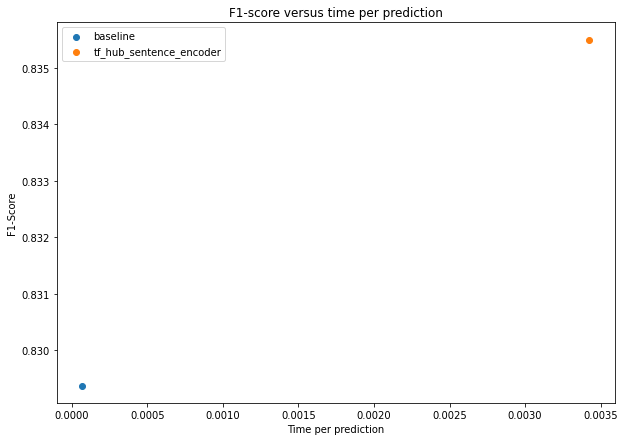

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

The ideal position for each of these dots is to be in the top left of the plot (low time per prediction, high F1-score).

In our case, there's a clear tradeoff for time per prediction and performance. Our best performing model takes an order of magnitude longer per prediction but only results in a few F1-score point increase.

This kind of tradeoff is something we'll need to keep in mind when incorporating machine learning models into our own applications.